In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
preco_petroleo = "/content/ipea.xlsx"

df_preco_petroleo = pd.read_excel(preco_petroleo)


display(df_preco_petroleo.head())


,Data,Preço ( petróleo bruto - Brent (FOB)
0,2024-11-12,72.56
1,2024-11-11,72.19
2,2024-11-08,74.04
3,2024-11-07,75.73
4,2024-11-06,76.52


In [20]:
print(df_preco_petroleo[df_preco_petroleo.isnull().any(axis=1)])

      Data  Preço ( petróleo bruto - Brent (FOB)
11298  NaT                                   NaN


In [21]:
df_preco_petroleo = df_preco_petroleo.dropna(subset=['Preço ( petróleo bruto - Brent (FOB)'])

In [22]:
print(df_preco_petroleo[df_preco_petroleo.isnull().any(axis=1)])
display(df_preco_petroleo.tail())

Empty DataFrame
Columns: [Data, Preço ( petróleo bruto - Brent (FOB)]
Index: []


,Data,Preço ( petróleo bruto - Brent (FOB)
11293,1987-05-26,18.63
11294,1987-05-25,18.60
11295,1987-05-22,18.55
11296,1987-05-21,18.45
11297,1987-05-20,18.63


In [23]:
df_preco_petroleo_renomeado = df_preco_petroleo.rename(columns={'Preço ( petróleo bruto - Brent (FOB)': 'Preço'})

In [24]:
print(df_preco_petroleo_renomeado.dtypes)

Data     datetime64[ns]
Preço           float64
dtype: object


In [25]:
display(df_preco_petroleo_renomeado.describe())

,Data,Preço
count,11298,11298.000000
mean,2006-10-21 08:07:38.842273024,53.323291
min,1987-05-20 00:00:00,9.100000
25%,1998-07-03 18:00:00,20.630000
50%,2007-05-30 12:00:00,48.920000
75%,2015-03-27 18:00:00,76.800000
max,2024-11-12 00:00:00,143.950000
std,NaN,33.159540


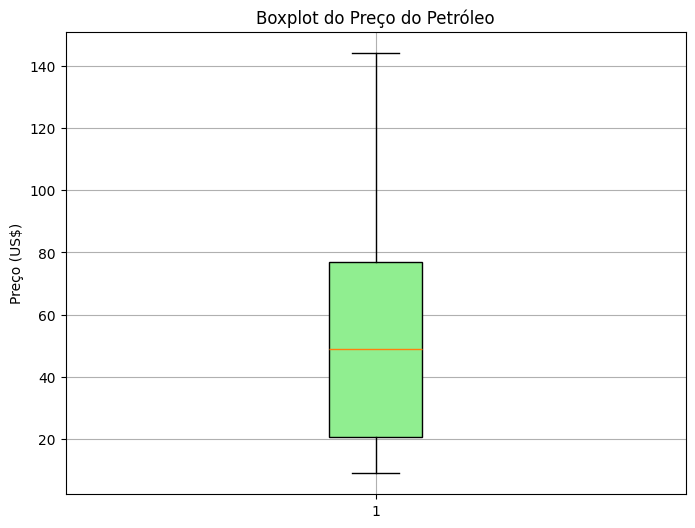

In [26]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_preco_petroleo_renomeado['Preço'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))

plt.title('Boxplot do Preço do Petróleo')
plt.ylabel('Preço (US$)')
plt.grid(True)

plt.show()

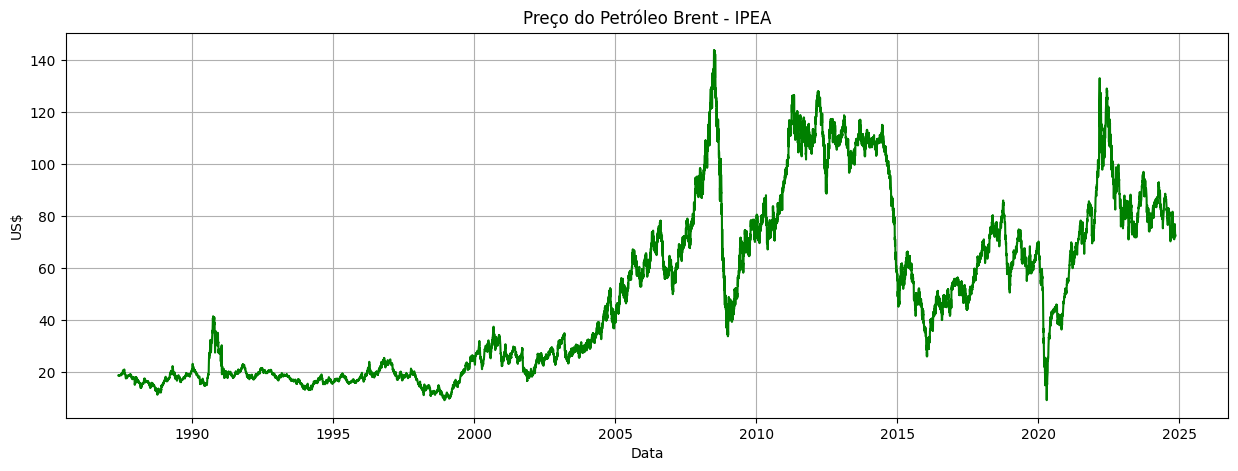

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(df_preco_petroleo_renomeado['Data'], df_preco_petroleo_renomeado['Preço'], color='green')

# Configurar título e rótulos dos eixos
plt.title('Preço do Petróleo Brent - IPEA')
plt.xlabel('Data')
plt.ylabel('US$')

# Adicionar grade
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [28]:
df_preco_petroleo_renomeado.set_index('Data', inplace=True)

In [29]:
df_preco_petroleo_renomeado.sort_index(inplace=True)

In [30]:
df_preco_petroleo_renomeado.tail()

,Preço
Data,
2024-11-06,76.52
2024-11-07,75.73
2024-11-08,74.04
2024-11-11,72.19
2024-11-12,72.56




*   Guerra EUA-Iraque (20/03/2003 - 01/05/2003) - Período que antecede a invasão e o período que teve início a invasão tiveram impacto no preço do petroléo, devido as tensões ocorridas devido a eminência do conflito. O fim oficial do conflito e desocupação das tropas americanas foi somente no ano de 2011.

* O ano de 2006 foi marcado pela descoberta do pré-sal. Sendo que, o primeiro anúncio oficial relacionado a descoberta de pré-sal ocorreu no 3º trimestre do ano. Neste ano o preço do petróleo foi muito impactado.

* A crise financeira de 2007, desencadeada pela desvalorização de ativos imobiliários, espalhou-se pelo mundo, levando à recessão global de 2009. Ela resultou na nacionalização de bancos, queda de governos, alta taxa de desemprego e protestos, muitos deles violentos.

* A Operação Lava Jato, deflagrada pela Polícia Federal em março de 2014, revelou um grande esquema de corrupção envolvendo a Petrobras, a maior estatal do Brasil, e passou a dominar o cenário econômico e político nacional.

*  Pandemia (11/03/2020 - 22/04/2022) – No Brasil, o Ministério da Saúde encerrou a Emergência em Saúde Pública de Importância Nacional (ESPIN) em 22/04/2022. Globalmente, a OMS declarou o fim oficial da pandemia em 05/05/2023.

*   Os conflitos entre Rússia e Ucrânia (2022) e Israel e Hamas (2023) estão impactando os preços do petróleo, influenciados por desafios na oferta e demanda, dificuldades na produção e circulação de mercadorias, e a especulação do mercado.



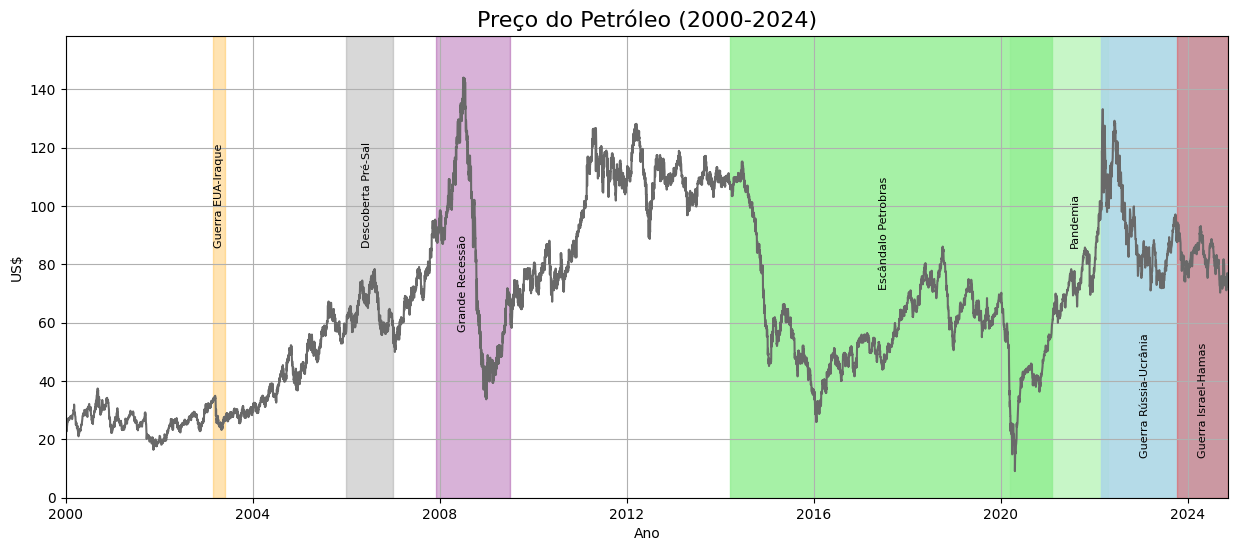

In [31]:
df_preco_petroleo_graf = df_preco_petroleo_renomeado[(df_preco_petroleo_renomeado.index >= '2000-01-01') & (df_preco_petroleo_renomeado.index <= '2024-11-12')]


fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(data=df_preco_petroleo_graf, x=df_preco_petroleo_graf.index, y='Preço', ax=ax, color='#696969')

# Guerra EUA-Iraque ( Período de Invasão)
ax.axvspan('2003-03-01', '2003-06-01', color='orange', alpha=0.3)
ax.text(pd.to_datetime('2003-04-10'), df_preco_petroleo_graf['Preço'].max() * 0.6, 'Guerra EUA-Iraque', rotation=90, fontsize=8, ha= 'center')

# Descoberta Pré-Sal
ax.axvspan('2006-01-01', '2006-12-31', color='grey', alpha=0.3)
ax.text(pd.to_datetime('2006-06-15'), df_preco_petroleo_graf['Preço'].max() * 0.6, 'Descoberta Pré-Sal', rotation=90, fontsize=8, ha= 'center')

# Grande Recessão
ax.axvspan('2007-12-01', '2009-06-30', color='purple', alpha=0.3)
ax.text(pd.to_datetime('2008-07-01'), df_preco_petroleo_graf['Preço'].max() * 0.4, 'Grande Recessão', rotation=90, fontsize=8, ha='center')

# Escândalo Petrobras
ax.axvspan('2014-03-17', '2021-02-01', color='lightgreen', alpha=0.8)
ax.text(pd.to_datetime('2017-07-01'), df_preco_petroleo_graf['Preço'].max() * 0.5, 'Escândalo Petrobras', rotation=90, fontsize=8, ha='center')

# Pandemia
ax.axvspan('2020-03-11', '2022-04-22', color='lightgreen', alpha=0.5)
ax.text(pd.to_datetime('2021-08-01'), df_preco_petroleo_graf['Preço'].max() * 0.6, 'Pandemia', rotation=90, fontsize=8, ha='center')

# Guerra Rússia-Ucrânia
ax.axvspan('2022-02-24', df_preco_petroleo_graf.index.max(), color='lightblue', alpha=0.9)
ax.text(pd.to_datetime('2023-02-01'), df_preco_petroleo_graf['Preço'].max() * 0.1, 'Guerra Rússia-Ucrânia', rotation=90, fontsize=8, ha='center')

# Guerra Israel-Hamas
ax.axvspan('2023-10-07', df_preco_petroleo_graf.index.max(), color='red', alpha=0.3)
ax.text(pd.to_datetime('2024-05-01'), df_preco_petroleo_graf['Preço'].max() * 0.1, 'Guerra Israel-Hamas', rotation=90, fontsize=8, ha='center')


ax.set_xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2024-11-12'))

ax.set_title('Preço do Petróleo (2000-2024)', fontsize=16)
ax.set_ylabel('US$')
ax.set_xlabel('Ano')
ax.set_ylim(0, df_preco_petroleo_graf['Preço'].max() * 1.10)
ax.grid(True)

plt.show()